In [1]:
from wifimapping import MappingController, AggregateMapper
from wifimapping.distribution_distances import emd, distribution_mean_manhattan_distance

In [2]:
# Add time to ground truth labels of a mapper so we can see which segment is which in the plot.
def add_time_labels(mapper):
    def formatTime(timestamp):
        return "{}:{}".format(timestamp.hour, timestamp.minute)

    for i, loc in enumerate(mapper.gt_positions):
        start, end = mapper.wifi_segments[i].timeframe
        loc += [formatTime(start), formatTime(end)]

Removing 0 Duplicates
Removing 81 zero-values
Final dataframe size: (31728, 6)
UUIDS: ['998ec5f7-71b4-4784-8779-bc7e2472b843'
 '04b675c1-ea23-4a1b-b273-8a9c17d398e3'
 'c1be26a6-a235-4ac2-832a-8389a2c83295'
 '5a92562f-a4a9-4771-ac13-c3e95483adce']
Computing segment distances
Calculating MDS coordinates.
Segments of 998ec5f7-71b4-4784-8779-bc7e2472b843: 33
Segments of 04b675c1-ea23-4a1b-b273-8a9c17d398e3: 32
Segments of c1be26a6-a235-4ac2-832a-8389a2c83295: 18
Segments of 5a92562f-a4a9-4771-ac13-c3e95483adce: 32


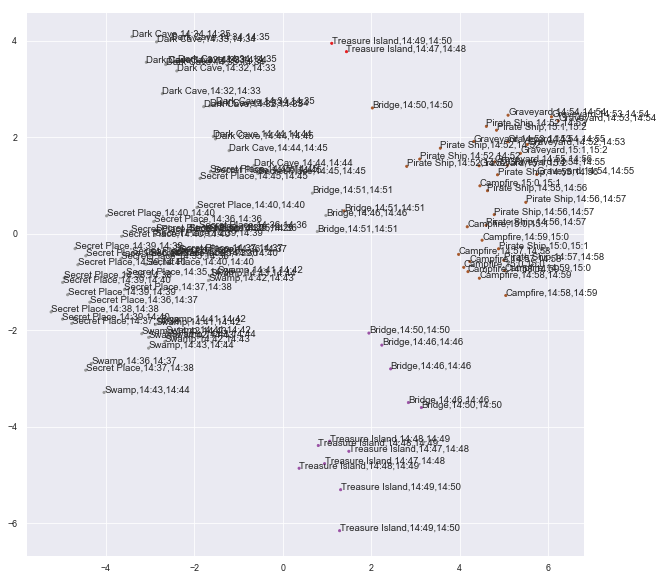

In [3]:
# Set mapping parameters.
params = {
    'mongourl': 'mongodb://localhost:27017/',
    'stationarity_threshold_ms': 10000,
    'distribution_types': 'kde',
    'distance_function': emd,
    'classify_outliers': False,
    'locs_file': '../data/ESP32_locations_example.csv',
    'bssid_file': '../data/ESP32_BSSIDs.csv'
}

# Init controller and load/preprocess data.
controller = MappingController(params)
# Load WiFi data and motion segments for the experiment.
controller.load_data("2019-06-07", "2019-06-08")
# Restrict wifi data to the experiment timeframe.
controller.wifiDf = controller.wifiDf.loc[controller.wifiDf.index < "2019-06-07 15:03"]

# Run the aggregate mapper which calculates an overall map for all devices. 
# Calculates distances and runs clustering algorithm.
totalMapper = controller.run_aggregate_mapper()
# Print number of segments for each individual mapper.
for m in totalMapper.mappers:
    print("Segments of {}: {}".format(m.uuid, len(m.wifi_segments)))
    
# Plot stationary WiFi segments.
plot_segment_times = True
if plot_segment_times:
    add_time_labels(totalMapper)
totalMapper.plot_segment_clustering(show=True, savefolder=None, labels='ground_truth')

Calculating MDS coordinates.


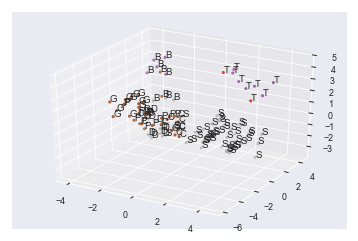

In [4]:
# Calculate and plot a 3D map instead of 2d.
m = totalMapper
totalMapper.calculate_coordinates(n_components=3)
totalMapper.plot_segment_clustering3d()